In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.datasets import make_circles
import math
import random as rd

In [0]:
def plot_clusters(points, cluster_labels, show_annotation=True):
  offset=0.01
  uniquelabels=np.unique(cluster_labels)
  print(uniquelabels)
  for cluster in uniquelabels:
    newx=[]
    newy=[]
    for i in range(len(cluster_labels)):
      if(cluster_labels[i]==cluster):
        newx.append(points[i][0])
        newy.append(points[i][1])
    plt.scatter(newx,newy,label=cluster)
  if(show_annotation==True):
    for i in range(points.shape[0]):
      plt.annotate(i,(points[i,0]+offset,points[i,1]+offset))
  plt.legend()

In [0]:
def heatmap(grid, xlabels, ylabels, xrot=90):   
    cmap = cm.get_cmap("viridis")
    plt.imshow(grid, cmap=cmap)
    plt.xticks(np.arange(0,grid.shape[1],step=1), xlabels, rotation=xrot)
    plt.yticks(np.arange(0, grid.shape[0], step=1), ylabels)

In [0]:
def initialise(points,K):

  cluster_centers=[]
  count=0
  while(count<K):

    rdpt=rd.randint(0,len(points)-1)
    if rdpt not in cluster_centers:
      cluster_centers.append(rdpt)
      count+=1

  return np.array(cluster_centers)

# ptindex=initialise(points,4)
# print(ptindex)

# initarray=[]
# for i in ptindex:
#   initarray.append(points[i].tolist())
# print(initarray)



In [0]:
def assign(points,initarray):
  clusters=np.zeros((len(points)))
  for pt in range(len(points)):
    min=1000000
    for i in range(len(initarray)):
      if(math.sqrt((initarray[i][0]-points[pt][0])**2 + (initarray[i][0]-points[pt][0])**2)<min):
        min=math.sqrt((initarray[i][0]-points[pt][0])**2 + (initarray[i][0]-points[pt][0])**2)
        clusters[pt]=i
  return clusters
        
# cluster_labels=assign(points,initarray)
# print(cluster_labels)

def assign1(points,cluster_centers):
  return np.argmin(euclidean_distances(points,cluster_centers),axis=1)

# print(assign1(points,initarray))



In [162]:


def recalculate_cluster_centers(points,cluster_labels,K):
  # for i in range(len(cluster_labels)):

  # cluster_centers=points[cluster_labels].mean()
  cluster_centers=np.zeros((K,2))
  for label in range(K):
    cluster_centers[label,:]= points[cluster_labels==label,:].mean(axis=0)
  return cluster_centers

np.random.seed(2)
cluster_centers = np.array([[0,0], [1,1], [2,2]])
# print(points)
cluster_labels = assign(points, cluster_centers)
print(cluster_labels)
recalculate_cluster_centers(points, cluster_labels, 3)




[1. 1. 1. 0. 1. 2. 2. 1. 2. 2. 1. 2. 1. 1.]


array([[0.48113208, 1.10315789],
       [1.13267453, 0.81434924],
       [1.99899633, 0.90784977]])

In [0]:
def Kmeans(points,K):
  cluster_labels = np.zeros((points.shape[0]))

  cluster_centers1=initialise(points,K)
  # print(cluster_centers1)
  initarray=[]
  for i in cluster_centers1:
    initarray.append(points[i].tolist())
  cluster_centers=np.array(initarray)
  # print(cluster_centers.shape,'cen')




  initial_centers=cluster_centers.copy()

  old_cluster_centers=np.zeros(cluster_centers.shape)
  # print(old_cluster_centers,cluster_centers)
  # print(not(old_cluster_centers==cluster_centers).all(),'ok')
  while not(old_cluster_centers==cluster_centers).all():
    # pass
  # while  not ((old_cluster_centers==cluster_centers).all()):
  #   print("hello")
    old_cluster_centers=cluster_centers.copy()

    cluster_labels=np.array(assign1(points,cluster_centers))
    # print(cluster_labels.shape,points.shape,"label")
    cluster_centers=recalculate_cluster_centers(points,cluster_labels,K)
  return cluster_labels,initial_centers,cluster_centers



[0 1 2 3 4]


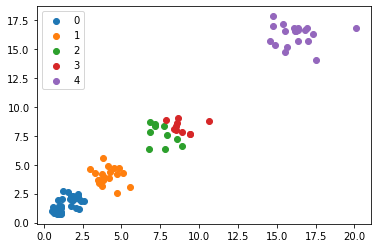

In [172]:
np.random.seed(2)
K = 5
n=10
X = []
for i in range(5):
    X.append(np.random.normal(2**i,(i+1)/5, size=(20,2)))

centers=np.zeros((K,2))
points = np.vstack(X)
for i in range(n):

  cluster_labels,initial_centers,final_centers=Kmeans(points,5)
  centers+=sorted(final_centers.tolist(),key= lambda x:x[0])
centers/=n
# plot_clusters(points, np.zeros((points.shape[0])), show_annotation=True)
labels=assign1(points,centers)

plot_clusters(points,labels,show_annotation=False)



[0 1]


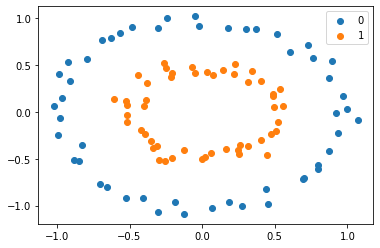

In [171]:

points, _ = make_circles(100, noise=0.06, factor=0.5)
negpos=np.zeros(points.shape)

for i in range(len(points)):
  negpos[i][0]=points[i][0]/np.abs(points[i][0])
  negpos[i][1]=points[i][1]/np.abs(points[i][1])
# print(negpos)
points=np.square(points)

# plt.scatter(points[:,0], points[:,1])


cluster_labels,initial_centers,final_centers=Kmeans(points,2)

# plot_clusters(points,cluster_labels,show_annotation=False)

points=np.sqrt(points)
for i in range(len(points)):
  points[i][0]*=negpos[i][0]
  points[i][1]*=negpos[i][1]
plot_clusters(points,cluster_labels,show_annotation=False)






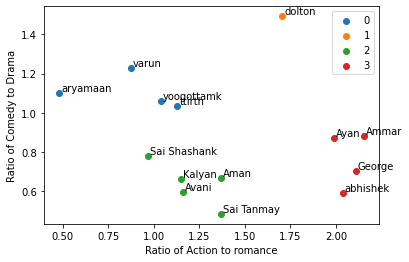

In [166]:

import json,os

# f = open("final_Ammar.json", "r")
data=[]
for i in os.listdir():
  if(i[0:5]=='final'):
    f=open(i,"r")
    data.append(json.loads(f.read()))
    f.close()

# print(data)
# data=json.load()
points=[]
names=[]
for i in data:
  if(i['username']!='Akshat'):
    filmno=len(i['movie_ids'])
    points.append([i['genre_freq_divided']['Action']/i['genre_freq_divided']['Romance'],i['genre_freq_divided']['Comedy']/i['genre_freq_divided']['Drama']])
    names.append(i['username'])
points=np.array(points)

cluster_labels,initial_centers,final_centers=Kmeans(points,4)


# def plot_clusters(points, cluster_labels, show_annotation=True):
offset=0.01
uniquelabels=np.unique(cluster_labels)
for cluster in uniquelabels:
  newx=[]
  newy=[]
  for i in range(len(cluster_labels)):
    if(cluster_labels[i]==cluster):
      newx.append(points[i][0])
      newy.append(points[i][1])
  plt.scatter(newx,newy,label=cluster)
# if(show_annotation==True):
for i in range(points.shape[0]):
  plt.annotate(names[i],(points[i,0]+offset,points[i,1]+offset))
plt.legend()
plt.xlabel("Ratio of Action to romance")
plt.ylabel("Ratio of Comedy to Drama")

plt.show()

# plt.scatter(x,y)



In [167]:
()

()